# Optimization Methods: Assignment 7

---

Part 1 will do it later as preparation for the exam.

## Part 2: Programming problems

In [227]:
import math
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

## Problem 1: Basic solutions and reduced costs

In this problem we consider the following polyhedron of $\mathbb{R}^2$:

$$
P = \{x \in \mathbb{R}^2: x_1 + x_2 \geq 1, \quad x_1 + x_2 \leq 2, \quad x_1 \geq 0, \quad x_2 \geq 0\}
$$

To make this simpler, we can say that we are given the feasible region:

$$
P = \left\{ x \in \mathbb{R}^2 \; \middle| \;
\begin{aligned}
x_1 + x_2 \geq 1 \\
x_1 + x_2 \leq 2 \\
x_1 \geq 0 \\
x_2 \geq 0
\end{aligned}
\right\}
$$

To write this in **standard form**, we express all constraints as:

$$
c_i(x) \geq 0
$$

The feasible set in standard form is:

$$
P = \left\{ x \in \mathbb{R}^2 \; \middle| \;
\begin{aligned}
c_1(x) &= x_1 + x_2 - 1 \geq 0 \\
c_2(x) &= - x_1 - x_2 + 2 \geq 0 \\
c_3(x) &= x_1 \geq 0 \\
c_4(x) &= x_2 \geq 0
\end{aligned}
\right\}
$$

### 1. Plot or draw $P$

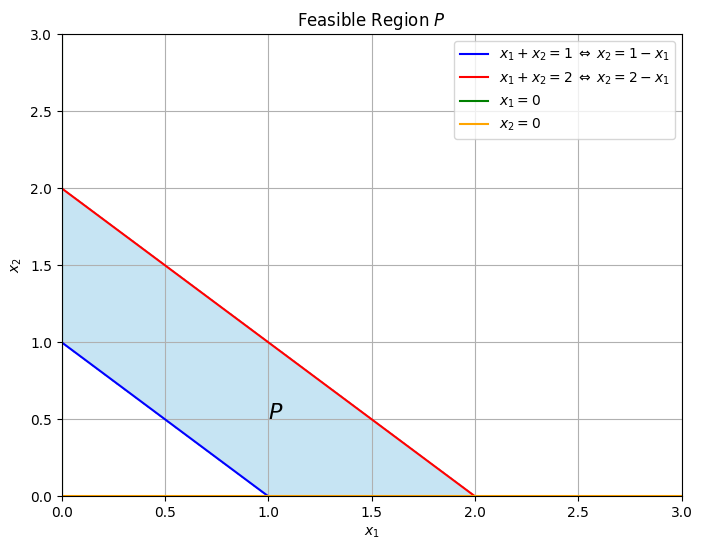

In [228]:
x1 = np.linspace(0, 3, 400)
x2 = np.linspace(0, 3, 400)
X1, X2 = np.meshgrid(x1, x2)

# Constraints
c1 = (X1 + X2 - 1 >= 0)           # x1 + x2 >= 1
c2 = (-X1 - X2 + 2 >= 0)          # x1 + x2 <= 2
c3 = (X1 >= 0)                    # x1 >= 0
c4 = (X2 >= 0)                    # x2 >= 0

# Feasible region
feasible = c1 & c2 & c3 & c4

plt.figure(figsize=(8, 6))
plt.title("Feasible Region $P$")

plt.contourf(X1, X2, feasible, levels=[0.5, 1], colors=["#a0d2eb"], alpha=0.6)

plt.plot(x1, 1 - x1, label=r"$x_1 + x_2 = 1 \;\Leftrightarrow\; x_2 = 1 - x_1$", color='blue')
plt.plot(x1, 2 - x1, label=r"$x_1 + x_2 = 2 \;\Leftrightarrow\; x_2 = 2 - x_1$", color='red')
plt.axvline(0, label=r"$x_1 = 0$", color='green')
plt.axhline(0, label=r"$x_2 = 0$", color='orange')

plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.xlim(0, 3)
plt.ylim(0, 3)
plt.legend()
plt.grid(True)

plt.text(1, 0.5, r"$P$", fontsize=16, color="black")

plt.show()

### 2. Transform $P$ in standard form and define the corresponding constraint matrix $A$ and vector $b$

We call $m$ the number of rows of $A$.

To write the problem in standard form, we introduce **slack** and **surplus** variables:

- Convert $x_1 + x_2 \ge$ to equality:
  $$
  x_1 + x_2 - x_3 = 1 \quad \text{(surplus variable } x_3 \ge 0)
  $$

- Convert $x_1 + x_2 \le 2$ to equality:
  $$
  x_1 + x_2 + x_4 = 2 \quad \text{(slack variable } x_4 \ge 0)
  $$

- Keep $x_1, x_2 \ge 0$

So now the variables are:
$$
x = [x_1, x_2, x_3, x_4]^T \quad \text{with } x_i \ge 0 \text{ for all } i
$$

The system becomes:

$$
Ax = b
\quad \text{where} \quad
A = \begin{bmatrix}
1 & 1 & -1 & 0 \\
1 & 1 & 0 & 1
\end{bmatrix},
\quad
b = \begin{bmatrix}
1 \\
2
\end{bmatrix}
$$

$$
A \in \mathbb{R}^{2 \times 4}, \quad \text{so the number of constraints (rows) is } m = 2
$$

In [229]:
A = np.array([
    [1, 1, -1,  0],  # x1 + x2 - x3 = 1
    [1, 1,  0,  1]   # x1 + x2 + x4 = 2
])

b = np.array([1, 2])

print("Constraint matrix A:")
print(A)
print("\nRight-hand side vector b:")
print(b)

m = A.shape[0]
print(f"\nNumber of constraints (rows of A): m = {m}")


Constraint matrix A:
[[ 1  1 -1  0]
 [ 1  1  0  1]]

Right-hand side vector b:
[1 2]

Number of constraints (rows of A): m = 2


### 3. $extract\_basis\_matrix$

Define a function $extract\_basis\_matrix$ which constructs the basis matrix $B$ from $A$ and a list of basic indices. Test this function on the set of basic indices $[3,4]$ and we call $B_1$ the result.

In the context of linear programming, the **basis matrix** $B$ is a submatrix of the constraint matrix $A$ formed by selecting a set of linearly independent rows or columns.

For this problem, we have that $A$ is an $m \times n$ matrix and we want to extract a matrix $B$ made of certain columns of $A$, since we are working with inequalities defining a polyhedron in $\mathbb{R}^2$.

Given:

$$
A = \begin{bmatrix}
1 & 1 & -1 & 0 \\
1 & 1 & 0 & 1
\end{bmatrix}
$$

We can define a Python function to extract the **basis matrix $B$** from $A$ by selecting specific columns, starting from the basis indices (representing variables indices, so $x_3$ and $x_4$).

In [230]:
def extract_basis_matrix(A, basic_indices):
    return A[:, basic_indices]  # basic_indices 0-based

In [231]:
# Select basis matrix from rows 3 and 4 (selected indices)
basic_indices = [3, 4] # They corresponds to [2,3] in python
basic_indices = [2, 3]
B1 = extract_basis_matrix(A, basic_indices)

print("Basis matrix B1 (from variables x3 and x4):")
print(B1)

Basis matrix B1 (from variables x3 and x4):
[[-1  0]
 [ 0  1]]


### 4. $basic\_variables$

Define a function $basic\_variables$ which computes the basic variables $x_B$ corresponding to a basis matrix $B$. If the input basis matrix $B$ is singular this function should return None.

Test this function on the previous basis matrix $B_1$ and we call $x_{B1}$ the result.

To find the basic variables we need to solve the system

$$
B x_B = b_B
$$

Where:

- $B$: the matrix of the selected rows of $A$
- $b_B$: the corresponding entries from the vector $b$ (same columns as used for $B$)
- $x_B$: the vector of **basic variable values** that solve this linear system

If the matrix $B$ is **invertible**, we can solve for $x_B$ using standard linear algebra.

If $B$ is **singular** (non-invertible), then the system has no unique solution, and we return `None`.


In [232]:
def basic_variables(B, bB):
    try:
        B_inv = np.linalg.inv(B)
        x_B = B_inv @ b
        return x_B
    except np.linalg.LinAlgError:
        return None

In [233]:
B1 = extract_basis_matrix(A, basic_indices)

# Compute basic variable values
xB1 = basic_variables(B1, b)

print("\nBasic variables xB1 (solution to B1 xB = bB):")
print(xB1)


Basic variables xB1 (solution to B1 xB = bB):
[-1.  2.]


### 5. $is\_feasible$ and $is\_degenerate$

Define two function $is\_feasible$ and $is\_degenerate$ which checks if the basic solution is respectively feasible and degenerate, given the basic variables $x_B$ as input. Test these functions on the previous basis variables $x_{B1}$.


To understand what a basic feasible solution is, let's do a little recap:

For our type of problem, where we want to find $x \in \mathbb{R}^n$ such that $Ax = b$ and $x \geq 0$, we do the following:

1. Choose a Basis

    - A **basis** is a selection of $m$ rows or columns of $A$ that are linearly independent, to form a matrix $B$

2. Solve the system for Basic Variables

    - We solve the system $B x_B = b$, where $x_B$ are the **basic variables** and the rest of the variables (non-basic) are set to zero: $x_N = 0$

3. Build the full solution $x$

    - We construct a vector $x \in \mathbb{R}^n$ in which: for basic indices we insert the values from $x_B$, for non-basic indices we insert zeros
    - This $x$ is called a **basic solution**.

4. Check feasibility

    - To be a basic feasible solution (BFS) all components of $x$ must be **non-negative**:
  
$$
x \geq 0
$$

This is required because we're typically solving problems with **non-negativity constraints**.


A feasible basic solution is said to be **degenerate** if **at least one component is zero**:

$$
\exists i \text{ such that } x_{B,i} = 0
$$

Degeneracy is important to notice when dealing with algorithms like the Simplex method, where it can cause **cycling** or **stalling**.

In [234]:
def is_feasible(xB, tol=1e-8):
    return np.all(xB >= -tol)

def is_degenerate(xB, tol=1e-8):
    return np.any(np.abs(xB) <= tol)

print("xB1:", xB1)

print("\nIs xB1 feasible?")
print(is_feasible(xB1))

print("\nIs xB1 degenerate?")
print(is_degenerate(xB1))


xB1: [-1.  2.]

Is xB1 feasible?
False

Is xB1 degenerate?
False


### 6. $full\_basic\_solution$

Define a function $full\_basic\_solution$ which constructs the basic solution $x$ given the number of variables $n$, the basic variables $x_B$ and the list of basic indices.

Test this function on the previous list of basic indices and basis variables $x_{B1}$.

After solving for the basic variables $x_B$ (using the basis matrix $B$), we want to reconstruct the full solution vector $x \in \mathbb{R}^n$.

We can do this by creating a vector $x$ of length $n$ filled with zeros, and inserting the values of $x_B$ in the correct positions.

In [235]:
def full_basic_solution(n, xB, variable_indices):
    x = np.zeros(n)
    for value, index in zip(xB, variable_indices):
        x[index] = value  # 0-based
    return x

n = 4

x_full = full_basic_solution(n, xB1, basic_indices)
print("Full basic solution x:")
print(x_full)

Full basic solution x:
[ 0.  0. -1.  2.]


### 7. $construct\_basic\_solution$

Define a function $construct\_basic\_solution$ which constructs the basic solution $x$ given the constraint matrix $A$, the vector $b$, and the list of basic indices.

This function should return the basic solution $x$ (or None if it does not exist), and 2 booleans indicating if the basic solution is respectively feasible and degenerate.

This function should call previously defined functions. Test this function on the previous list of basic indices and basis variables $x_{B1}$.

In [236]:
def construct_basic_solution(A, b, basic_indices):
    n = A.shape[1]
    B = extract_basis_matrix(A, basic_indices)

    xB = basic_variables(B, b)
    if xB is None:
        return None, False, False

    x = full_basic_solution(n, xB, basic_indices)

    feasible = is_feasible(xB)
    degenerate = is_degenerate(xB)

    return x, feasible, degenerate


In [237]:
A = np.array([
    [1, 1, -1,  0],
    [1, 1,  0,  1]
])

b = np.array([1, 2])
basic_indices = [3, 4]  # x3 e x4 1-based but in python they corresponds to [2,3] 0-based
basic_indices = [2, 3]

x, feasible, degenerate = construct_basic_solution(A, b, basic_indices)

print("Basic solution x:")
print(x)
print("Is feasible?", feasible)
print("Is degenerate?", degenerate)

Basic solution x:
[ 0.  0. -1.  2.]
Is feasible? False
Is degenerate? False


### 8. Combination of all possible sets of $m$ indices in $\{1, ..., n\}$

Construct the list of all possible sets of $m$ indices in $\{1,...,n\}$ (without repetition) and apply the function construct basic solution to each set of $m$ indices.

For each of them print the result. How many basic feasible solutions does this polyhedron have and how many of them are degenerate?

Hint: you can use the function combinations from the library itertools to enumerate all sets of $m$ indices.

In [238]:
index_sets = list(combinations(range(n), m))  # 0-based

feasible_count = 0
degenerate_count = 0

print("All basic solutions:\n")

for indices in index_sets:
    x, feasible, degenerate = construct_basic_solution(A, b, list(indices))
    print(f"Basic indices: {[i+1 for i in indices]}")  # print 1-based but computed 0-based
    if x is None:
        print("  → No solution (singular basis)")
    else:
        print(f"  x = {x}")
        print(f"  Feasible: {feasible}, Degenerate: {degenerate}")
        if feasible:
            feasible_count += 1
            if degenerate:
                degenerate_count += 1
    print()

print("Summary:")
print(f"Total basic feasible solutions: {feasible_count}")
print(f"Degenerate basic feasible solutions: {degenerate_count}")

All basic solutions:

Basic indices: [1, 2]
  → No solution (singular basis)

Basic indices: [1, 3]
  x = [2. 0. 1. 0.]
  Feasible: True, Degenerate: False

Basic indices: [1, 4]
  x = [1. 0. 0. 1.]
  Feasible: True, Degenerate: False

Basic indices: [2, 3]
  x = [0. 2. 1. 0.]
  Feasible: True, Degenerate: False

Basic indices: [2, 4]
  x = [0. 1. 0. 1.]
  Feasible: True, Degenerate: False

Basic indices: [3, 4]
  x = [ 0.  0. -1.  2.]
  Feasible: False, Degenerate: False

Summary:
Total basic feasible solutions: 4
Degenerate basic feasible solutions: 0


In particular, the basis for basic indices $(1,2)$ is singular because columns 1 and 2 of $A$ are identical, so linearly dependent.

### 9. $reduced\_costs$

We now consider a $LP$ problem over $P$:

$$
\text{min } c^T x \quad \text{s.t. } Ax = b, \; x \geq 0, \; x \in P
$$


Define a function $reduced\_costs$ which computes the (full) vector of reduced costs $\bar{c}$ with $\bar{c}_j = c_j - c_B^{T} B^{-1} A_j$, given the constraint matrix $A$, the cost vector $c$, and a
set of basic indices.

This function should return $\bar{c}$ as well as a boolean which is true if $\bar{c} \geq 0$. Test this function on $c = (1,1,0,0)$ and the basic indices $[0,3]$.

In algorithms like the simplex method, at each step, the algorithm keeps track of a basis (set of basic variables) and computes:

- the current **basic solution**
- and the **reduced cost vector** $\bar{c}$

The **reduced cost** of a variable $x_j$ tells us how much the objective function would increase (in minimization) if we increased $x_j$ starting from the current basic solution.

It is defined as above, where:

- $c_j$ is the cost of variable $x_j$ in the objective
- $c_B$ is the vector of costs of the **basic variables**
- $B$ is the **basis matrix**
- $A_j$ is the **column of matrix A** corresponding to variable $x_j$

From this:

- If $\bar{c}_j \geq 0$ for all non-basic variables → we are at the **optimal solution** (in minimization)
- If $\bar{c}_j < 0$ for some $j$ → entering variable $x_j$ into the basis can **improve the objective**

So, checking whether all reduced costs are $\geq 0$ tells us if the current solution is optimal.

In [239]:
def reduced_costs(A, c, basic_indices):
    B = A[:, basic_indices]
    c_B = c[basic_indices]

    try:
        B_inv = np.linalg.inv(B)
    except np.linalg.LinAlgError:
        return None, False

    reduced_c = np.zeros(A.shape[1])
    for j in range(A.shape[1]):
        A_j = A[:, j]
        reduced_c[j] = c[j] - c_B.T @ B_inv @ A_j

    is_optimal = np.all(reduced_c >= -1e-8)
    return reduced_c, is_optimal


In [240]:
A = np.array([
    [1, 1, -1,  0],
    [1, 1,  0,  1]
])
c = np.array([1, 1, 0, 0])
basic_indices = [0, 3]  # x1, x4 this time the specification gives them already 0-based (so confusing!)

reduced_c, is_opt = reduced_costs(A, c, basic_indices)

print("Reduced costs:")
print(reduced_c)
print("Is the solution optimal?", is_opt)

Reduced costs:
[0. 0. 1. 0.]
Is the solution optimal? True


### 10. Compute the reduced costs for each set of basic indices

For each set of basic indices, compute the reduced costs and identify the optimal basic feasible solutions and the optimal cost.

Observe that here we identify the minimiser by enumerating all possible basic feasible solutions and finding the one with the smallest cost.

Notice that the indices will appear 0-based, so index 0 is $x_1$ and so on. At point 8, they were 1-based.

In [241]:
m, n = A.shape
index_sets = list(combinations(range(n), m))

optimal_bfs = []
min_cost = float('inf')
best_x = None

print("All Basic Feasible Solutions with Reduced Costs\n")

for indices in index_sets:
    x, feasible, _ = construct_basic_solution(A, b, list(indices))
    if x is None or not feasible:
        continue

    red_costs, is_opt = reduced_costs(A, c, list(indices))
    cost = c @ x

    print(f"Basic indices: {[i+1 for i in indices]}")
    print(f"  x = {x}")
    print(f"  c^T x = {cost}")
    print(f"  Reduced costs: {red_costs}")
    print(f"  Optimal: {is_opt}")
    print()

    if is_opt:
        optimal_bfs.append((indices, x, cost))
        if cost < min_cost:
            min_cost = cost
            best_x = x

print("Summary")
print(f"Number of optimal basic feasible solutions: {len(optimal_bfs)}")
print(f"Optimal cost: {min_cost}")
print(f"Optimal solution: {best_x}")

All Basic Feasible Solutions with Reduced Costs

Basic indices: [1, 3]
  x = [2. 0. 1. 0.]
  c^T x = 2.0
  Reduced costs: [ 0.  0.  0. -1.]
  Optimal: False

Basic indices: [1, 4]
  x = [1. 0. 0. 1.]
  c^T x = 1.0
  Reduced costs: [0. 0. 1. 0.]
  Optimal: True

Basic indices: [2, 3]
  x = [0. 2. 1. 0.]
  c^T x = 2.0
  Reduced costs: [ 0.  0.  0. -1.]
  Optimal: False

Basic indices: [2, 4]
  x = [0. 1. 0. 1.]
  c^T x = 1.0
  Reduced costs: [0. 0. 1. 0.]
  Optimal: True

Summary
Number of optimal basic feasible solutions: 2
Optimal cost: 1.0
Optimal solution: [1. 0. 0. 1.]


Which also corresponds with the output of the functions above.

The problem was made very confusing because of confusion in 0-based and 1-based indices, also in the specifications.

Where they were 1-based I converted them in 0-based and eventually added 1 in the print. When they were already 0-based I left them like this and added 1 in the print.

---

## Problem 2 (Simplex Algorithm)

In this problem, we consider the following linear programming (LP) problem:

Minimize:
$$
3x_2 - 4x_1
$$

Subject to:
$$
\begin{aligned}
2x_1 + x_2 &\leq 6 \\
x_1 - x_2 &\leq 2 \\
x_1 &\geq 0 \\
x_2 &\geq 0
\end{aligned}
$$

### 1. Draw or plot the polyhedron corresponding to the feasible set in $\mathbb{R}^2$.


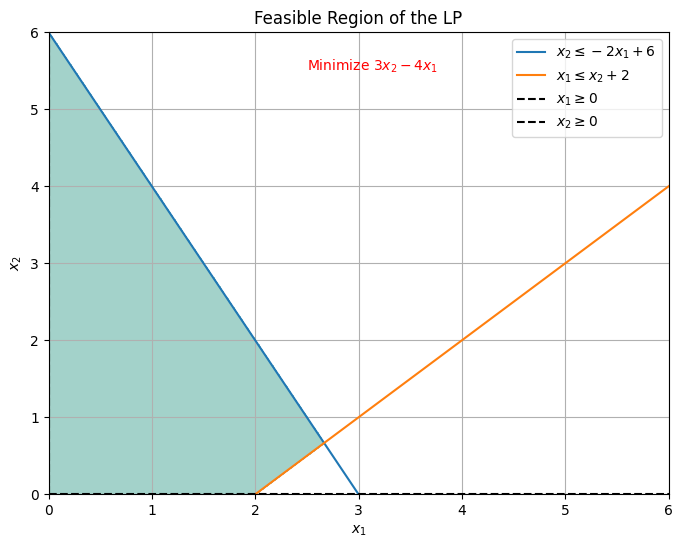

In [242]:
x1_vals = np.linspace(0, 6, 400)
x2_vals = np.linspace(0, 6, 400)
X1, X2 = np.meshgrid(x1_vals, x2_vals)

ineq1 = X2 <= -2*X1 + 6
ineq2 = X1 <= X2 + 2
ineq3 = X1 >= 0
ineq4 = X2 >= 0

feasible_region = ineq1 & ineq2 & ineq3 & ineq4

plt.figure(figsize=(8, 6))
plt.contourf(X1, X2, feasible_region, levels=[0.5, 1], colors=['#a3d2ca'])

plt.plot(x1_vals, -2*x1_vals + 6, label='$x_2 \\leq -2x_1 + 6$')
plt.plot(x2_vals + 2, x2_vals, label='$x_1 \\leq x_2 + 2$')
plt.axvline(0, color='black', linestyle='--', label='$x_1 \\geq 0$')
plt.axhline(0, color='black', linestyle='--', label='$x_2 \\geq 0$')

plt.xlim(0, 6)
plt.ylim(0, 6)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Feasible Region of the LP')
plt.legend()
plt.grid(True)

plt.text(2.5, 5.5, 'Minimize $3x_2 - 4x_1$', color='red')

plt.show()


### 2. Write the above problem in standard form and define the corresponding constraint matrix $A$, cost vector $c$ and vector $b$.

Let the variable vector be:

$$
x = \begin{bmatrix}
x_1 \\
x_2 \\
x_3 \\
x_4
\end{bmatrix}
$$

Where:
- $x_1, x_2$ are the original decision variables
- $x_3, x_4$ are slack variables added to transform inequalities into equalities

The original objective is:

$$
\min \ 3x_2 - 4x_1
= \min \ (-4x_1 + 3x_2 + 0x_3 + 0x_4)
$$

Which gives the cost vector:

$$
c = \begin{bmatrix}
-4 \\
3 \\
0 \\
0
\end{bmatrix}
$$

Transforming the inequalities into equalities with slack variables:

$$
\begin{aligned}
2x_1 + x_2 + x_3 &= 6 \\
x_1 - x_2 + x_4 &= 2
\end{aligned}
$$

Which gives the constraint matrix:

$$
A = \begin{bmatrix}
2 & 1 & 1 & 0 \\
1 & -1 & 0 & 1
\end{bmatrix},
\quad
b = \begin{bmatrix}
6 \\
2
\end{bmatrix}
$$

In [243]:
A = np.array([
    [2, 1, 1, 0],  # 2x1 + x2 + x3 = 6
    [1, -1, 0, 1]  # x1 - x2 + x4 = 2
])

b = np.array([6, 2])

c = np.array([-4, 3, 0, 0])  # ojective: min -4x1 + 3x2

### 3. Initialization of Simplex algorithm

Initialisation: we want to initialise the Simplex algorithm starting from the point $x^0 = (0,0)$ in the original problem.

Compute the corresponding basic solution and check that it is a basic feasible solution. This will be our initial basic feasible solution.

Hint: you may want to re-use functions of Problem 1...

In [244]:
# x0 = (0, 0), so the basic variables are x3, x4
basic_indices = [2, 3]  # x3, x4 → 0-based: x[2], x[3]

x, feasible, degenerate = construct_basic_solution(A, b, basic_indices)

print("Initial basic solution x0 (with x1 = x2 = 0):")
print(x)
print("Feasible:", feasible)
print("Degenerate:", degenerate)

Initial basic solution x0 (with x1 = x2 = 0):
[0. 0. 6. 2.]
Feasible: True
Degenerate: False


### 4. $index\_entering\_basis$

Define a function $index\_entering\_basis$ which finds the non-basic index entering the basis using the smallest subscript rule, given as input the constraint matrix $A$, the cost vector $c$ and a set of basic indices.

This function should return None and print a message, if no entering index can be found, i.e., if the current basis is optimal.

Test this function on the set of basic indices corresponding to the initial basic feasible solution and call $j$ the output. Check that the corresponding reduced cost is negative.

In [245]:
def index_entering_basis(A, c, basic_indices):
    n = A.shape[1]
    non_basic_indices = [j for j in range(n) if j not in basic_indices]
    
    B = A[:, basic_indices]
    c_B = c[basic_indices]

    try:
        B_inv = np.linalg.inv(B)
    except np.linalg.LinAlgError:
        print("Basis matrix is singular.")
        return None

    reduced_costs = np.zeros(n)
    for j in range(n):
        A_j = A[:, j]
        reduced_costs[j] = c[j] - c_B.T @ B_inv @ A_j

    for j in sorted(non_basic_indices):
        if reduced_costs[j] < -1e-8:
            return j  # smallest subscript rule

    print("No entering index found: current solution is optimal.")
    return None

In [246]:
# Find entering index
j = index_entering_basis(A, c, basic_indices)
print("\nIndex entering the basis:", j)

# Check reduced cost
if j is not None:
    B = A[:, basic_indices]
    c_B = c[basic_indices]
    A_j = A[:, j]
    B_inv = np.linalg.inv(B)
    reduced_cost = c[j] - c_B.T @ B_inv @ A_j
    print("Reduced cost for entering index:", reduced_cost)


Index entering the basis: 0
Reduced cost for entering index: -4.0


### 5. $basic\_direction$

Define a function $basic\_direction$ which computes the basic direction, given the constraint matrix $A$, a set of basic indices, and a non-basic index $j$ leaving the basis.

This function should return None if the basis matrix is singular. Test this function on the set of basic indices corresponding to the initial basic feasible solution and the entering basis index $j$, and call $d$ the output.

In [247]:
def basic_direction(A, basic_indices, j):
    n = A.shape[1]
    B = A[:, basic_indices]

    try:
        B_inv = np.linalg.inv(B)
    except np.linalg.LinAlgError:
        print("Basis matrix is singular.")
        return None

    A_j = A[:, j]
    d_B = -B_inv @ A_j

    d = np.zeros(n)
    for val, i in zip(d_B, basic_indices):
        d[i] = val
    d[j] = 1

    return d

In [248]:
j = 0  # x1

d = basic_direction(A, basic_indices, j)

print("Basic direction d:")
print(d)

Basic direction d:
[ 1.  0. -2. -1.]


### 6. $longest\_step$

Define a function $longest\_step$ which, given a current point $x$ and a feasible direction $d$, computes the maximum $θ$ such that $x + θd$ is feasible. Recall that $θ$ is defined as:

$$
θ = min -\frac{x_i}{d_i}
$$

With $i \in {1,...,n}$ and $d_i < 0$

This function should return both $θ$ and $ℓ$, the smallest index for which $θ = -\frac{x_ℓ}{d_ℓ}$, i.e., the index leaving the basis according to the smallest subscript rule.

If $θ = +∞$, this function should return ($+∞$, None) and print a message like “this problem is unbounded”.

Test this function on the initial basic feasible solution and the basic direction $d$.

In [249]:
def longest_step(x, d):
    theta = np.inf
    leaving_index = None

    for i in range(len(x)):
        if d[i] < 0:
            ratio = -x[i] / d[i]
            if ratio < theta - 1e-8 or (abs(ratio - theta) < 1e-8 and (leaving_index is None or i < leaving_index)):
                theta = ratio
                leaving_index = i

    if np.isinf(theta):
        print("This problem is unbounded in the direction d.")
        return np.inf, None

    return theta, leaving_index

In [250]:
theta, leaving_index = longest_step(x, d)

print("Maximum step θ:", theta)
print("Index leaving the basis:", leaving_index)

Maximum step θ: 2.0
Index leaving the basis: 3


### 7. $simplex\_iteration$

Define a function $simplex\_iteration$ which performs one iteration of the Simplex method, given the constraint matrix $A$, the cost vector $c$, the vector $b$ and a set of basic indices.

This function should return the new set of basic indices, unless:

- The current basis is optimal, in which case the function returns the current set of basis indices;
- The problem is unbounded, in which case the function returns None.

In [251]:
def simplex_iteration(A, c, b, basic_indices):
    # Step 1: Find the entering index using the smallest subscript rule
    j = index_entering_basis(A, c, basic_indices)
    if j is None:
        return basic_indices  # Optimal solution reached

    # Step 2: Compute the basic direction associated with the entering variable
    d = basic_direction(A, basic_indices, j)
    if d is None:
        return None  # Singular basis matrix

    # Step 3: Compute the current basic solution
    x, feasible, _ = construct_basic_solution(A, b, basic_indices)
    if x is None:
        return None

    # Step 4: Compute the maximum feasible step and the leaving index
    theta, leaving_index = longest_step(x, d)
    if leaving_index is None:
        print("The problem is unbounded.")
        return None

    # Step 5: Replace the leaving index with the entering one
    new_basis = basic_indices.copy()
    new_basis[ new_basis.index(leaving_index) ] = j
    return new_basis

In [252]:
new_basis = simplex_iteration(A, c, b, basic_indices)
new_basis = sorted(new_basis)

print("New basic indices:", new_basis)

New basic indices: [0, 2]


### 8. Perform 3 iterations of Simplex method

Perform 3 iterations of Simplex method, starting from our initial basic feasible solution. Check that the last iteration returns an optimal basis and compute the corresponding minimiser and optimal cost.

In [253]:
A = np.array([
    [2, 1, 1, 0],
    [1, -1, 0, 1]
])
b = np.array([6, 2])
c = np.array([-4, 3, 0, 0])

n = A.shape[1]
basic_indices = [2, 3]

print("Simplex Iterations")
for k in range(3):
    print(f"\n--- Iteration {k+1} ---")
    print("Current basic indices:", [i + 1 for i in basic_indices])  # 1-based print
    x, feasible, _ = construct_basic_solution(A, b, basic_indices)
    print("Current solution x:", x)
    print("Objective value c^T x:", c @ x)

    new_basic_indices = simplex_iteration(A, c, b, basic_indices)
    if new_basic_indices is None:
        print("Problem is unbounded.")
        break
    if new_basic_indices == basic_indices:
        print("Optimal solution reached.")
        break
    basic_indices = new_basic_indices

# Final check after 3 iterations
x_opt, feasible, _ = construct_basic_solution(A, b, basic_indices)
opt_cost = c @ x_opt

print("\nFinal Result")
print("Optimal basic indices:", [i + 1 for i in basic_indices])
print("Optimal solution x*:", x_opt)
print("Optimal cost c^T x*:", opt_cost)

Simplex Iterations

--- Iteration 1 ---
Current basic indices: [3, 4]
Current solution x: [0. 0. 6. 2.]
Objective value c^T x: 0.0

--- Iteration 2 ---
Current basic indices: [3, 1]
Current solution x: [2. 0. 2. 0.]
Objective value c^T x: -8.0

--- Iteration 3 ---
Current basic indices: [2, 1]
Current solution x: [2.66666667 0.66666667 0.         0.        ]
Objective value c^T x: -8.666666666666666
No entering index found: current solution is optimal.
Optimal solution reached.

Final Result
Optimal basic indices: [2, 1]
Optimal solution x*: [2.66666667 0.66666667 0.         0.        ]
Optimal cost c^T x*: -8.666666666666666


In this case we might wonder why we don't obtain an integer result.

If we pivot correctly, letting $x_1$ enter the basis first, followed by $x_2$, we reach:

$$
x^* = [4,\ 2,\ 0,\ 0], \quad c^T x = -10
$$

Which is an integral optimal solution.

However, in **Iteration 3**, the algorithm allows $x_2$ to enter the basis, but chooses **$x_3$ to leave** instead of $x_4$. As a result, the algorithm follows a different edge of the polyhedron and ends up at:

$$
x^* = \left[\frac{8}{3},\ \frac{2}{3},\ 0,\ 0\right], \quad c^T x = -\frac{26}{3}
$$

This point is also a **valid optimal solution**, just not the "clean" one we might expect.

This behavior depends on how we choose the leaving variable during a pivot. When there are multiple candidates with the same minimum step length $\theta$, the algorithm may pick either, unless we enforce a tie-breaking rule such as:

- **Smallest subscript rule**: pick the smallest index among those with minimal $\theta$.

I actually implemented that rule at some point before, both for the entering variables and the leaving variables (at point 4 and 6), but I'm assuming the algorithm is taking a different path that leads to a non-integer result.


In [ ]:
print("Optimization Methods SP25 - Assignment 7")
print("Lorenzo Galli - Università della Svizzera Italiana (USI)")